In [37]:
import numpy as np
import matplotlib.pyplot as plts
import pyclesperanto_prototype as cle
import pandas as pd
from tqdm import tqdm
import scipy.ndimage as ndimage


In [111]:
import skimage.filters as fil

In [136]:
B2=np.load("B11_analyze.npy")

In [133]:
B2.shape

(800, 1080, 1080, 2)

In [137]:
sigma_spot_detection = 5
sigma_outline = 3

segmented_label=np.zeros((B2.shape[0],B2.shape[1],B2.shape[2]))
for i in tqdm(range(B2.shape[0])):
    input_image=B2[i,:,:,0]
    th=fil.threshold_otsu(ndimage.gaussian_filter(input_image,sigma=3))
    input_image= th < input_image
    #input_gpu = cle.push(ndimage.median_filter(input_image,size=2))
    input_gpu = cle.push(input_image)
    segmented_label[i] = cle.pull(cle.voronoi_otsu_labeling(input_gpu))
    

100%|█████████████████████████████████████████| 800/800 [04:55<00:00,  2.70it/s]


In [138]:
np.save("B11_label_fin.npy",segmented_label)

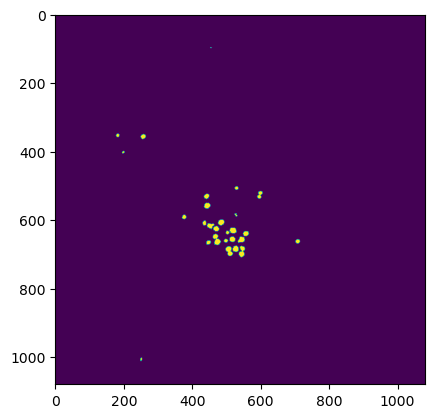

In [121]:
plt.imshow(input_image)

In [123]:
input_image=B2[3,:,:,0]
th=fil.threshold_otsu(ndimage.gaussian_filter(input_image,sigma=3))
input_image= th < input_image
#input_gpu = cle.push(ndimage.median_filter(input_image,size=2))
input_gpu = cle.push(input_image)
sigma_spot_detection = 5
sigma_outline = 1

segmented = cle.voronoi_otsu_labeling(input_gpu)

([], [])

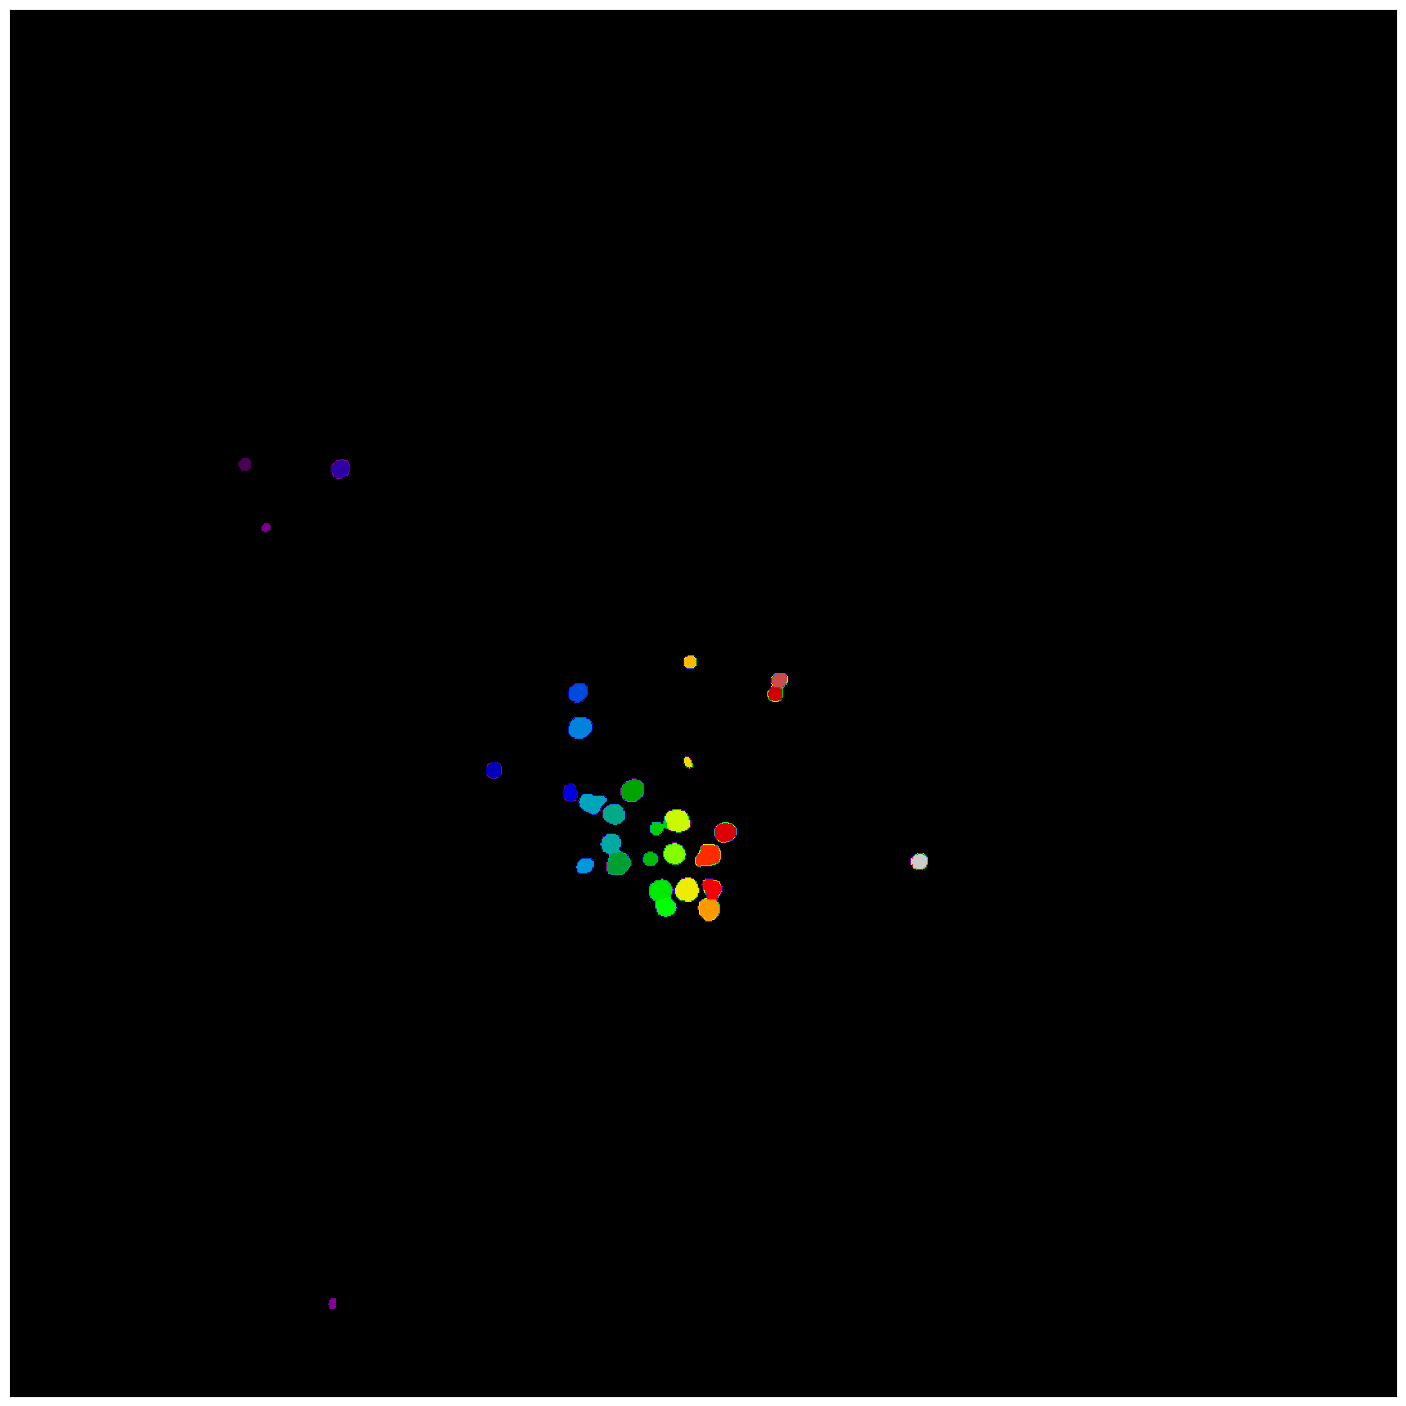

In [124]:
temp=np.array(segmented)
#temp[~(temp==15)]=0
plt.figure(figsize=(18,18))
plt.imshow(temp,cmap="nipy_spectral")
plt.xticks([])
plt.yticks([])


cl.OCLArray([[ 1,  1,  1, ..., 11, 11, 11],
       [ 1,  1,  1, ..., 11, 11, 11],
       [ 1,  1,  1, ..., 11, 11, 11],
       ...,
       [ 3,  3,  3, ..., 27, 27, 27],
       [ 3,  3,  3, ..., 27, 27, 27],
       [ 3,  3,  3, ..., 27, 27, 27]], dtype=uint32)
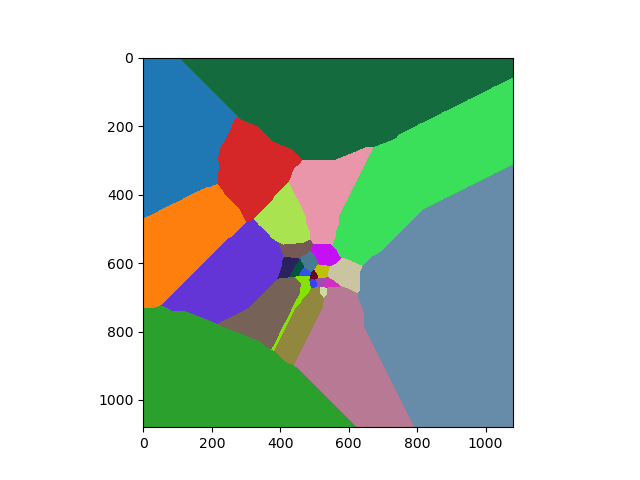

In [122]:
segmented

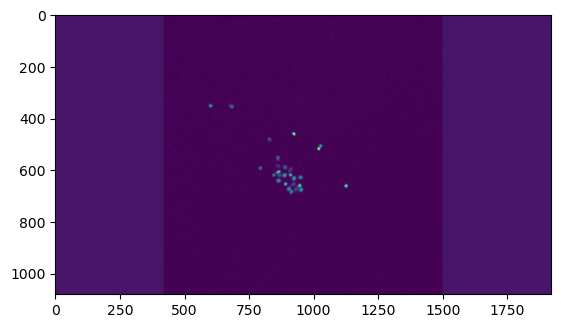

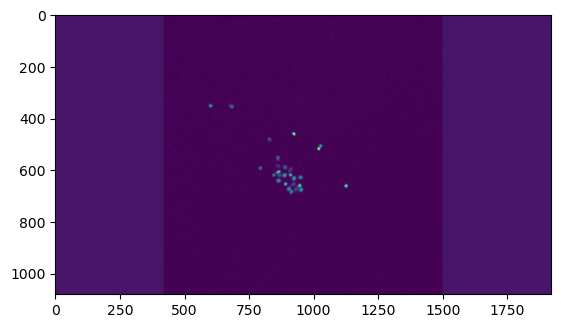

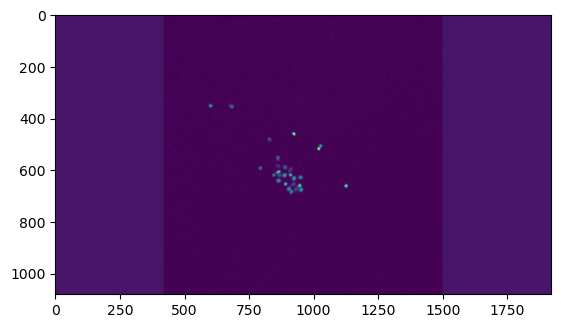

In [20]:
for i in range(3):
    plt.imshow(videodata_2[0,:,:,i])
    plt.show()